<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 3 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Martin Salinas Scussolin; 201773557-0 ; Malla Nueva </h4>
    <h4> Jose Quezada Silva ; 201773528-7 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Mayo 2019</h4></center>
</p>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choices
import statistics
from scipy import stats
import math
import seaborn as sn

## 1. LDA (40p)

Es de mucho interés hoy en día el hecho de poder construir un clasificador que pueda inferir reglas a partir de los datos para poder predecir a futuro, en esta sección trabajará con una versión simplificada del dataset del titanic (data_titanic.csv), la que contiene 3 columnas:

* Age: la edad del pasajero
* Fare: el precio del boleto
* Survived: si sobrevivió a la tragedia o no

(Si, estamos en el ámbito multivariado ahora)

El clasificador, en breves palabras, intenta maximizar $P(Y=survived|X=age,fare)$ asumiendo que los datos ($X$) provienen de una distribución Gaussiana Multivariada. Se espera que usted sea capaz de obtener los máximos verosímiles de los parámetros de esta distribución para poder construir su clasificador **a mano**.

>a) Construya un clasificador LDA que permita distinguir si un pasajero sobrevive o no dado su edad y precio del ticket. *Recomendación: Puede separar una cantidad pequeña de datos para utilizarlos para probar su clasificador, es muy importante que si hace esto, estos datos no sean utilizados en la construcción del clasificador* 

Cualquier uso de las funciones provistas por los lenguajes que implementen LDA implica puntaje 0 en esta sección **sin excepción**.

Esta pregunta es un poco extensa por lo que se recomienda leer bien el material provisto (mas abajo) y los libros guías del curso. No es necesario que responda todo de una, puede ir por partes, es más, esto es recomendable porque así puede ir ganando puntaje y no jugarse todo en un "funciona/no funciona" recuerde explicar bien su razonamiento.

Si se complica mucho intente el caso univariado primero (fare vs survived ó age vs survived), si solamente presenta el univariado podrá optar a solamente 10 puntos del total (siempre y cuando esté bien).

Material que podría resultar útil:
* [Video](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Articulo LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)
* [Explicacion matematica de sklearn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
* Libros Guía indicados en el Syllabus(verosimilitud)


### Desarrollo

En primer lugar, se busca el valor de la máxima verosimilitud de los parámetros de la distribución, en este caso normal. Para esto se utiliza la función de verosimilitud en la distribución, que consiste en el producto de todos los valores que toma.

<br>
    <center>
    $\frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\bigg(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2\bigg) 
    \implies 
    \frac{1}{(2\pi\sigma^2)^\frac{n}{2}} exp\bigg(-\frac{1}{2}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^2\bigg)$
    </center>  
<br>

Siendo n la cantidad de observaciones.  
  
Luego, se aplica la función logaritmo natural para buscar la log-verosimilitud, por conveniencia de cálculos.

<br>  
    <center>
    $-\frac{n}{2}log(2\pi\sigma^2)-\frac{1}{2}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^2$
    </center>
<br>  

Con el fin de maximizar $\sigma$ (varianza) y $\mu$(valor esperado), se deriva la fórmula con respecto a estas variables.
  
Con respecto a $\sigma^2$:
<br>
    <center>
    $-\frac{n}{2\sigma^2}+\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2=0$  
    </center>  
<br>
    <center>
    $n\sigma^2=\sum_{i=1}^{n}(x_i-\mu)^2$  
    </center>
<br>
    <center>
    $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu)^2$
    </center>  

Con respecto a $\mu$:  
    <center>
    $\sum_{i=1}^{n}\frac{(x_i-\mu)}{\sigma^2}=0$
    </center>
<br>
    <center>
    $\sum_{i=1}^{n}(x_i-\mu)=0$
    </center>
<br>
    <center>
    $n\mu=\sum_{i=1}^{n}x_i$
    </center>
<br>
    <center>
    $\mu=\sum_{i=1}^{n}\frac{x_i}{n}$
    </center>
<br>

Sin embargo, en este caso se requiere de un clasificador multivariado, al que corresponde la notación vectorial.  

Los máximos verosímiles con múltiples variables son similares, solo que se consideran las dos dimensiones presentes en este caso.  
De esta manera, el vector promedio $\hat{\mu}$ corresponde a 

<br>
    <center>
    $\frac{1}{n}\sum_{i=1}^{n}X_i$
    </center>  
<br>

Mientras que $\hat{\Sigma}$
<br>
    <center>
    $\sum_{k=0}^{K}\frac{1}{N-K}\sum_{i=1}^{n}(x_i-\hat\mu_k)(x_i-\hat\mu_k)^T$
    </center>
<br>
La idea es llegar a una fórmula que, dado un vector, definido en este caso por la edad y el costo del pasaje, lo clasifique en una de las clases de interés, o sea, si el pasajero vive o muere, mediante la maximización de la probabilidad de pertenecer a una de estas clases. **

<br>  
Por Bayes  
    <center>
    $máx\:P(Y=k|X=x)=\frac{f_k(x) \pi_k}{\sum_{l=1}^{k}f_l(x) \pi_l}$
    </center>
<br>

Siendo $\pi_k \equiv P(Y=k)$  

La función de densidad $f_k(x)$ corresponde a una distribución normal multivariada:  

<br>
    <center>
    $f_k(x)=|2\pi\Sigma_k|^\frac{1}{2}exp\bigg(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\bigg)$
    </center>
<br>

En LDA, se considera la misma matriz de covarianza para toda clase k, o sea $\Sigma_k=\Sigma$  
  
De la misma manera que antes, se aplica el logaritmo natural a la función que se quiere maximizar una vez introducida la función de densidad en ella.  

<br>
    <center>
    $máx\:\bigg(-\frac{1}{2}log|2\pi\Sigma|-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)+log(\pi_k)\bigg)$
    </center>
<br>

A continuación se eliminan las variables que no dependen de k, puesto que son innecesarias para buscar el máximo valor de la fórmula.

<br>
    <center>
    $máx\:\bigg(-\frac{1}{2}(x^T\Sigma^{-1}x+\mu_k^{-1}\Sigma^{-1}\mu_k)+x^T\Sigma^{-1}\mu_k+log(\pi_k)\bigg)$
    </center>
<br>

Resultando en la función lineal discriminante:
    <center>
    $\delta(x)=-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+x^T\Sigma^{-1}\mu_k+log(\pi_k)$
    </center>
<br>

A través de esta función, se puede clasificar el vector x dentro de una de las clases (k). El vector x pertenece a la clase cuyo valor de la función discriminante sea mayor.

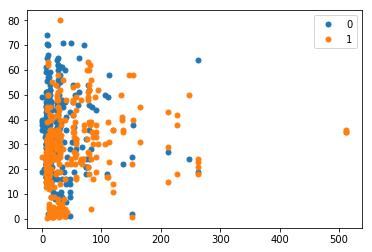

d(Clase 0):  6.009633162447731
d(Clase 1):  6.99739799110498
Pasaje:  200 	Edad:  55
VIVEN!

None


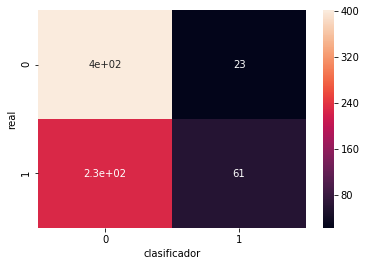

In [16]:
#Funcion determinante lineal que reciba un archivo csv, una edad y un costo para predecir si vive o muere.
def openCSV(file, col = []):
    try:
        fDf = pd.read_csv(file, delimiter=",")
    
    except FileNotFoundError:
            print("Nombre de archivo incorrecto.")

    if col != []:
        fDf = fDf[col]
    
    return fDf
    
    
    #Clasificador
def DoAClass(df, fare, age, show = False):
    
    #Vivo o muerto
    DoA = -1
    
    #vector (fare,age)
    x = np.array([fare,age])

    #Se separan las clases
    tClass0 = df[df["Survived"] == 0]
    tClass1 = df[df["Survived"] == 1]

    #Promedios por clase
    pK0 = tClass0.shape[0]/df.shape[0]
    pK1 = tClass1.shape[0]/df.shape[0]
    
    #Matriz común de covarianza
    covT = np.cov(df[["Fare","Age"]],rowvar = False)
    
    #Medias
    meanFare0 = tClass0[["Fare"]].mean()
    meanAge0 = tClass0[["Age"]].mean()
    
    meanFare1 = tClass1[["Fare"]].mean()
    meanAge1 = tClass1[["Age"]].mean()
    
    #Vectores promedio 
    meanV0 = np.array([meanFare0,meanAge0])
    meanV1 = np.array([meanFare1,meanAge1])

    #Función lineal discriminante para x entregado
    D0 = -0.5 * (np.transpose(meanV0).dot(np.linalg.inv(covT))).dot(meanV0)[0][0] + (np.transpose(x).dot(np.linalg.inv(covT))).dot(meanV0)[0] + np.log(pK0)
    D1 = -0.5 * (np.transpose(meanV1).dot(np.linalg.inv(covT))).dot(meanV1)[0][0] + (np.transpose(x).dot(np.linalg.inv(covT))).dot(meanV1)[0] + np.log(pK1)
    
    if D0 > D1:
        DoA = 0
    else: 
        DoA = 1
    
    if show:
        print("d(Clase 0): ", D0)
        print("d(Clase 1): ", D1)

        print("Pasaje: ",fare,"\tEdad: ",age)
    if DoA:
        if show:
            print (print("VIVEN!\n"))
        return True
    else:
        if show:
            print("Murió.\n")
        return False


    #Gráfico
def GrafClass(df):

    groups = df.groupby('Survived')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group.Fare, group.Age, marker = 'o', linestyle = '', ms = 5, label = name)
    ax.legend()
    x =  plt.show()


def matriz_confusion(df):
    
    real = []
    clasificador = []
    
    for p in df.iterrows():

        if DoAClass(df,p[1][1],p[1][2]):
            clasificador.append(1)
        else:
            clasificador.append(0)

        real.append(int(p[1][0]))

    CM = pd.crosstab([real], [clasificador], rownames = ["real"], colnames = ["clasificador"])
    return CM

    
T = openCSV('titanic.csv',["Survived","Fare","Age"])

#Se consideran solo datos con edades válidas
T = T[T.Age >= 0]

#T = T.sample(n = 20) #muestra
GrafClass(T)
DoAClass(T,200,55,True)

sn.heatmap(matriz_confusion(T),annot = True)

## 2. Teorema de la Función Inversa (10p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

Para trabajar el teorema de la función inversa siga los siguientes pasos:

1. Identificar la función que defina a la variable aleatoria.
2. De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).
3. De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$
4. Generar 10000 valores que siguen la distribución $u \sim U(0,1)$ y utilícelos como argumento en la función inversa encontrada
5. Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 
6. Concluya respecto a lo que observa en ambas gráficas.

### Desarrollo

1)Notamos que la función que define a la variable aleatoria es la siguiente

$$f(x;\alpha,\beta) = \frac{\alpha}{\beta^\alpha}x^{\alpha - 1}\cdot exp\left( \frac{-x}{\beta}\right)^{\alpha}$$

2)Usando las propiedades, la función de densidad acumulada se puede obtener integrando $f(x;\alpha,\beta)$ desde $-\infty$ hasta la variable aleatoria $X$:

$$F(X;\alpha,\beta) = \int_{-\infty}^{X}f(x;\alpha,\beta)\ dx$$

resultando en:

$$\int_{-\infty}^{X} \frac{\alpha}{\beta^\alpha}x^{\alpha - 1}\cdot exp\left( \frac{-x}{\beta}\right)^{\alpha}\ dx\ \ =\ 1 - exp\left( \frac{-X}{\beta}\right)^{\alpha}$$ 

Luego, la función de distribución acumulada queda:
$$F(X;\alpha,\beta) = \ 1 - exp\left( \frac{-X}{\beta}\right)^{\alpha}$$ 

Notamos que esta función es biyetiva en ($-\infty,1)$ y por lo tanto invertible.

3)Reemplazando $\alpha = 10, \beta = 3$, nos queda:

$$F(X) = \ 1 - exp\left( \frac{-X}{3}\right)^{10}$$ 

Despejando $X$:
$$ln(1 - Y) = ln\left(exp\left( \frac{-X}{3}\right)^{10}\right)$$

$$X = \frac{3}{10}ln\left(\frac{1}{1 - Y}\right)$$ 

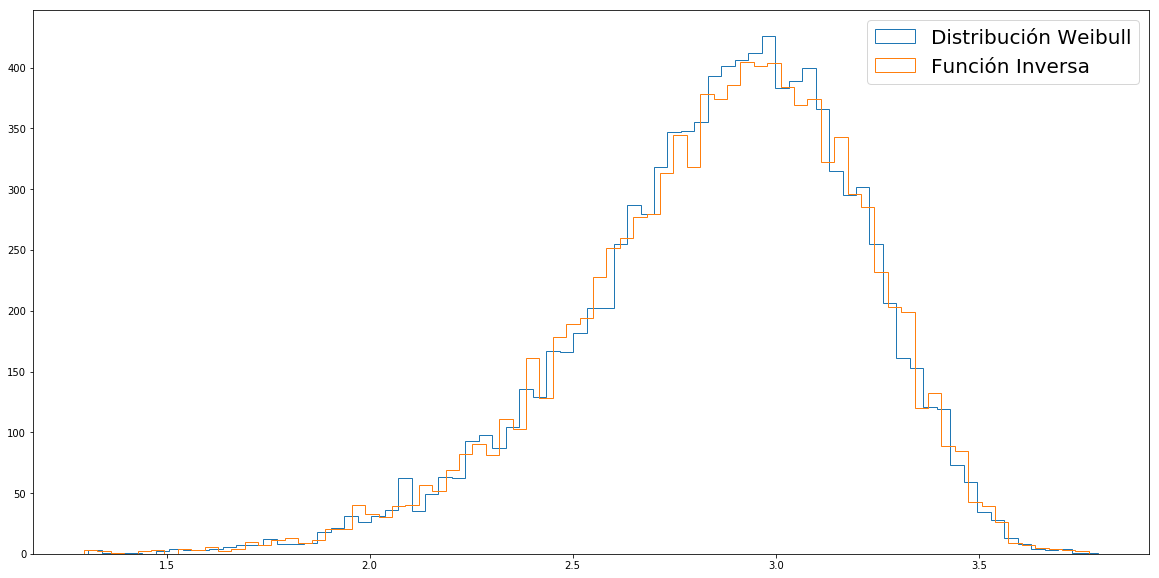

In [8]:
# 4) Al generar los valores según la distribución u, se tiene que:

x = lambda a: 3 *(math.log(1/(1-a))**(1/10))         # Función inversa
data = stats.uniform.rvs(loc=0,scale=1, size=10000)  # datos de distribucion uniforme
data2 = [x(y) for y in data]                         # se le aplica la funcion inversa a los datos de la distribucion uniforme

# funcion que obtiene datos de una distribucion de weibull con parametros a y b de tamaño (size)
def lambTimesWeib(a,b,size):                         
    x = np.random.weibull(a=a,size=size)
    return b*x

y = lambTimesWeib(10,3,10000)                       # datos distribucion de weibull


#------------ PLOT ----------------#
bins = 75
plt.figure(figsize=(20,10))

plt.hist(y, bins=bins, histtype="step", label="Distribución Weibull")
plt.hist(data2, bins=bins, alpha=1, histtype="step", label="Función Inversa")

plt.legend(loc='best', prop={'size': 20})
plt_=plt.plot()

### Resupuesta

En base a los gráficos obtenidos, se puede ver una semejanza aprente en los gráficos de las distribuciones, ergo, podemos decir que funcionó. :)
En otras palabras, es válido realizar la aseveración de que se cumple el teorema de la función inversa.

## 3. Teorema del Límite Central (30p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección se trabajará con la siguiente distribución y se demostrará lo que enuncia el TLC.

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

>a) Determine el valor esperado y la varianza **TEÓRICOS**

### Desarrollo

Dada la fórmula del valor esperado:
$$ E[X] = \sum_{x \in R_{X}} {x \cdot P(x)} $$

y la fórmula para la varianza:
$$ \sigma^2 (x) = E[X^2] - E[X]^2 $$
Se tiene que los valores teóricos serán:

In [4]:
valorEsperado =   1*0.1 + 2*0.2 + 5*0.05 + 6*0.05 + 7*0.2 + 9*0.10 + 10*0.05 + 11*0.2 + 12*0.05 
sqrdEsp =   (1**2)*0.1 + (2**2)*0.2 + (5**2)*0.05 + (6**2)*0.05 + (7**2)*0.2 + (9**2)*0.10 + (10**2)*0.05 + (11**2)*0.2 + (12**2)*0.05 
Varianza = sqrdEsp - (valorEsperado**2)
print("El valor esperado es: ", valorEsperado)
print("La varianza es: ", round(Varianza,2))

El valor esperado es:  6.65
La varianza es:  14.03


>b) Con $P = 10,1000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ compare los resultados obtenidos para los dos $P$ dados. Presente los datos en una tabla ordenada con columnas: $n,\;P=10,\;P=1000$ Comente, ¿qué parece influir mas, la cantidad de repeticiones, el tamaño de la muestra o ambas?

In [11]:

# funcion que selecciona una cantidad de veces determinada (repExp), (numsToDraw) numeros con probabilidad (probs)
def selectRandom(repetitionsExp, numsToDraw, values, probs):
    lRet = list()
    for exp in range(repetitionsExp):
        alpha = list()
        for num in range(numsToDraw):
            alpha.append(choices(values, probs).pop())      
        lRet.append(statistics.mean(alpha))
    return lRet

# funcion que añade los datos a una lista del experimento
def appendExpToList(newList, Exps, values, probs, reps):
    for i in Exps:
        newList.append(selectRandom(reps, i, values, probs))
        
tablaValores = [1, 2, 5, 6, 7, 9, 10, 11, 12]
tablaProbs = [0.1, 0.2, 0.05, 0.05, 0.2, 0.1, 0.05, 0.2, 0.05]

n = [2,10,30,100,1000]

P10 = list()
P1000 = list()

appendExpToList(P10, n, tablaValores, tablaProbs, 10)
appendExpToList(P1000, n, tablaValores, tablaProbs, 1000)

In [12]:
P10_2 = [statistics.mean(x) for x in P10]
P1000_2 = [statistics.mean(x) for x in P1000]

dataFrameToShow = pd.DataFrame({"n" : n, "P = 10" : P10_2, "P = 1000" : P1000_2})
dataFrameToShow.round(4)

,n,P = 10,P = 1000
0,2,6.6500,6.6670
1,10,6.1100,6.6688
2,30,6.4267,6.6557
3,100,6.5250,6.6623
4,1000,6.6771,6.6478


Con los datos obtenidos anteriormente, se puede ver una mayor influencia aparente de la cantidad de repeticiones del experimento, dado que los datos están más cercanos a 6.65 en la columna de P = 1000.

>c) Con lo obtenido en b) haga un histograma para las muestras de tamaño 2, 30 y 1000 de P = 1000. Comente lo que observa y concluya. ¿Se cumple lo que enuncia el teorema del límite central?

### Desarrollo
Al ordenar los datos en un dataframe, se tiene una mayor facilidad para graficar los datos en boxplots. Se toman los datos para n = 2, 30, 1000 de P = 1000 como columnas del dataframe. Para luego tomarlas cada una como grafico.

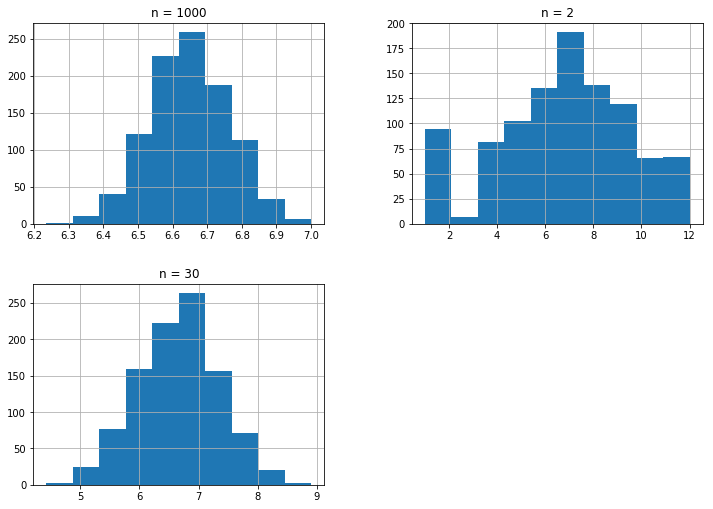

In [13]:
dfBoxPlt_1000 = pd.DataFrame({"n = 2": P1000[0],"n = 30": P1000[2],"n = 1000": P1000[4]})
dfBoxPlt_1000.hist(figsize=(12,8.5))
plt.show()

### Respuesta
Al observar los boxplots, se puede ver que hay una mayor concentración de los datos alrededor de lo que sería el promedio teórico para n = 1000, por lo que se puede ver reflejado, siempre y cuando existan una cantidad de datos decente (mayor que 2), que los datos obtenidos seguirán una distribucion normal.


## 4. Ley de los Grandes Números (20p)

En estadística, la ley de los grandes números engloba teoremas que describen el comportamiento del promedio de una distribución de variables aleatorias. La ley de los grandes números dice que, en pocas palabras, a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

Un estudio realizado en el casino de la universidad MSU, indica que el tiempo de espera en la cola del casino para obtener su almuerzo puede modelarse como una distribución Exponencial con parámetro: $\lambda = 0.1$

>a) **Utilizando las funciones provistas por los lenguajes** calcule la probabilidad **teórica** de que un alumno espere menos de 10 minutos, exactamente 20 minutos y más de 50 minutos.

### Desarrollo

Dadas las funciones de python es posible calcular para $\lambda = 0.1$ con el parámetro scale de la función stats.expon de scipy, además se utiliza la función de probabilidad acumulada cdf.

In [9]:
expDistrib = stats.expon(scale=1/0.1)
PX10 = expDistrib.cdf(x=10)
PX20 = expDistrib.pdf(x=20)
PX50 = expDistrib.cdf(x=50)

print("Probabilidad de que un alumno espere menos de 10 min:    ", round(PX10, 3))
print("Probabildiad de que un alumno espere exactamente 20 min: ", round(PX20, 3))
print("Probabilidad de que un alumno espere más de 50 min:      ", round(1 - PX50, 3))

Probabilidad de que un alumno espere menos de 10 min:     0.632
Probabildiad de que un alumno espere exactamente 20 min:  0.014
Probabilidad de que un alumno espere más de 50 min:       0.007


>b) Ahora genere 3 muestras de dicha distribución exponencial, con tamaños n = 5, 100, 300, 10000. Para cada una de estas muestras determine las mismas probabilidades calculadas en a) de manera empírica, comente sus resultados.

In [6]:

# función que retorna una lista con 3 arreglos de distribucion exponencial de tamaño n
def returnSets(n):
    return [stats.expon.rvs(scale=1/0.1, size=n) for i in range(3)]

# funcion que calcula las probabilidades solicitadas en base al set de datos de la funcion anterior
def probSet(s):
    retList = list()
    for i in s:
        ListProb10 = list()
        ListProb20 = list()
        ListProb50 = list()
        for x in i:            
            if x < 10: ListProb10.append(1)
            elif x == 20: ListProb20.append(1)
            elif x > 50: ListProb50.append(1)
        
        retList.append((sum(ListProb10)/len(i), sum(ListProb20)/len(i), sum(ListProb50)/len(i)))
    return retList

# funcion que calcula las probabilidades finales sumandolas y obteniendo el promedio entre ellas
def sumProbSet(s):
    final = list()
    x, y, z = s
    final.append((x[0]+y[0]+z[0])/3)
    final.append((x[1]+y[1]+z[1])/3)
    final.append((x[2]+y[2]+z[2])/3)
    return final

# funcion que retorna el promedio de un set de datos tipo probset (de la funcion returnSets)
def listMean(L):
    return sum([statistics.mean(x) for x in L])/3

t5 = returnSets(5)
t100 = returnSets(100)
t300 = returnSets(300)
t10000 = returnSets(10000)

n5 = sumProbSet(probSet(t5))
n100 = sumProbSet(probSet(t100))
n300 = sumProbSet(probSet(t300))
n10000 = sumProbSet(probSet(t10000))

pd.DataFrame({"Probability": ["X < 10", "X = 20", "X > 50"],
                   "n = 5": n5,"n = 100": n100,"n = 300": n300, 
                   "n = 10000": n10000})

,Probability,n = 5,n = 100,n = 300,n = 10000
0,X < 10,0.733333,0.643333,0.625556,0.630000
1,X = 20,0.000000,0.000000,0.000000,0.000000
2,X > 50,0.000000,0.006667,0.006667,0.006667


Según los resultados obtenidos, se puede apeciar que a medida que aumenta la cantidad de datos en la muestra, los resultados deseados se acercarán más a los resultados teóricos. Además se puede apreciar que el resultado de X = 20 debe ser 0, lo que resulta ser cierto, sin embargo, la probabilidad teórica en este caso es cercana a 0, puesto que el valor tiene un output de función probabilidad cercano a 0.

>c) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? ¿Y cuál es la empírica? ¿Si difieren o son iguales a qué se debe esto?

### Desarrollo 
En este caso, la media teórica de las distribuciones, debe ser $\frac{1}{\lambda}$.
Por lo que se tiene $\bar{x} = \frac{1}{0.1} = 10$.

En el caso de la media emprírica, se tiene lo siguiente:

In [11]:
# tabla con la información. Se utiliza un dataframe para una mejor estética.
pd.DataFrame({"Cantidad de datos" : ["5","100","300","10000"], "Promedio" : [listMean(t5), listMean(t100), 
                                                                             listMean(t300), listMean(t10000)]})

,Cantidad de datos,Promedio
0,5,13.771192
1,100,10.052461
2,300,10.573957
3,10000,9.927065


Se puede ver que los resultados obtenidos empíricamente, son muy similares al resultado teórico. Sin embargo, cada vez que se aumenta la cantidad de datos en la muestra, el promedio es mucho más cercano a el valor teórico, esto se debe a la diferencia en la cantidad de datos puesto que al tener más, se puede acercar mejor a la distribución total, lo que significa que se acercarán más al promedio teórico.

>d) Genere **un** gráfico de 4 boxplot (1 de cada distribución) y compárelos. Comente lo que observa y concluya respecto a la ley de los grandes números.

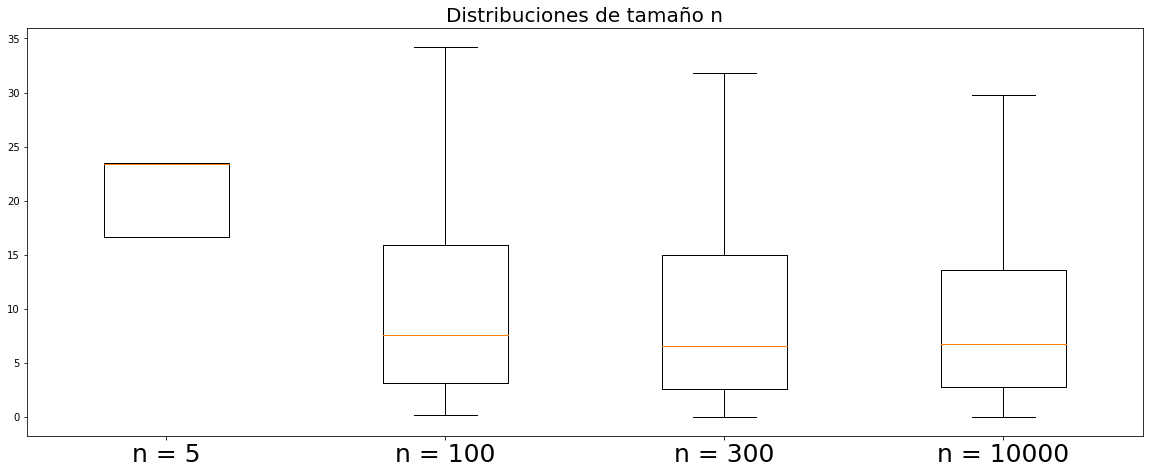

In [16]:
plt.figure(figsize=(20,7.5))                            # se prepara el tamaño del grafico
plt.title("Distribuciones de tamaño n",fontsize=20)     # titulo
plt.boxplot([t5[0],                                     
             t100[0],
             t300[0],
             t10000[0]], showfliers=False)              # se grafica en boxplots sin outliers 
a, labels =plt.xticks()
labels = ["n = 5", "n = 100", "n = 300", "n = 10000"]   # etiquetas del eje x
plt.xticks(a,labels, fontsize=25)                       
m=plt.plot()                                            #grafico

### Respuesta

En efecto, se puede ver reflejada la ley de los grandes números, puesto que al analizar los boxplots de cada distribución, se puede destacar que los datos se encuentran cada vez menos dispersos con respecto a la caja, además de las respuestas anteriores, se tiene que el promedio parece converger al promedio teórico de la distribución. 

# EOF